Application Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None

Previous Application Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_

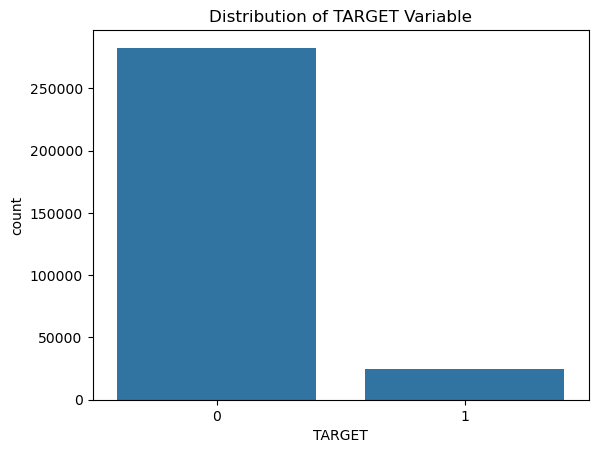

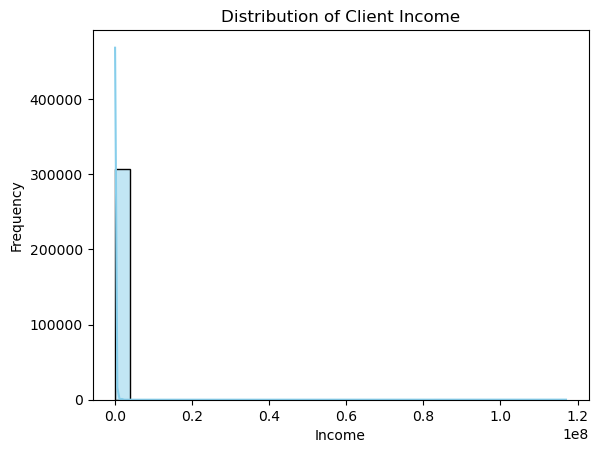

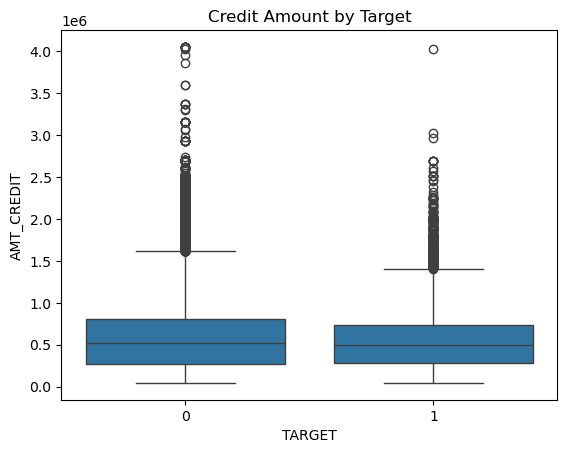

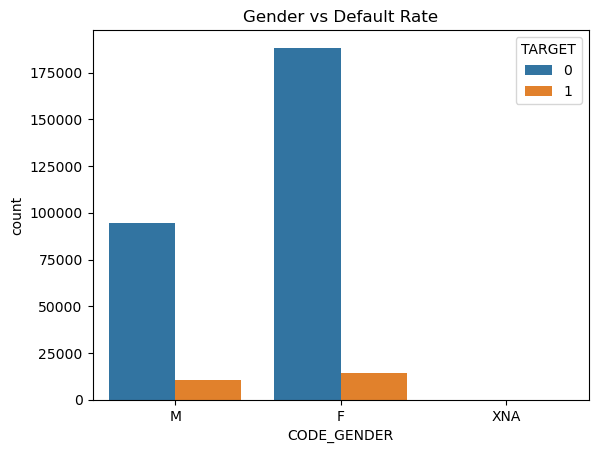

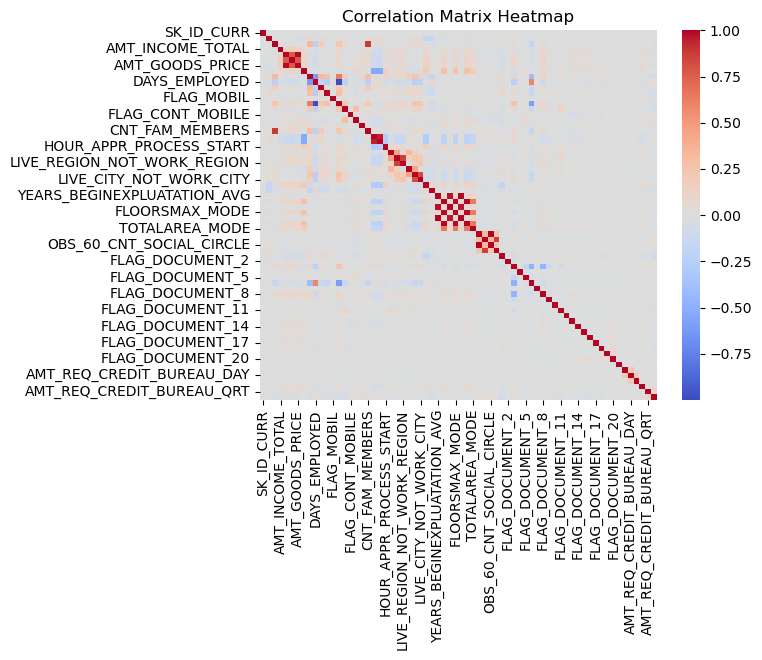

Available Features for Pairplot: ['AMT_CREDIT', 'AMT_ANNUITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# import all three csv files in Credit Risk Analysis folder
application_data = pd.read_csv("application_data.csv") 
previous_application = pd.read_csv("previous_application.csv")
columns_description = pd.read_csv("columns_description.csv", encoding='ISO-8859-1')  

print("Application Data Info:")
print(application_data.info())
print("\nPrevious Application Data Info:")
print(previous_application.info())

# Step 3: Inspect columns in the columns_description.csv
print("\nColumns in columns_description.csv:")
print(columns_description.columns)

# Step 4: Show column descriptions
# Assuming the correct columns are 'Name' and 'Description' (adjust based on inspection)
if 'Column' in columns_description.columns and 'Description' in columns_description.columns:
    print("\n--- Column Descriptions ---")
    for index, row in columns_description.iterrows():
        print(f"Column: {row['Column']} - Description: {row['Description']}")
else:
    print("\nColumn names in 'columns_description.csv' might differ. Please check the file.")
    
# Step 5: Data Cleaning
# Removing columns with more than 50% missing values
application_data = application_data.loc[:, application_data.isnull().mean() < 0.5]
previous_application = previous_application.loc[:, previous_application.isnull().mean() < 0.5]

# Filling missing values with median for numerical columns
numerical_cols = application_data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    application_data[col] = application_data[col].fillna(application_data[col].median())

# Step 6: Univariate Analysis
sns.countplot(data=application_data, x='TARGET')
plt.title("Distribution of TARGET Variable")
plt.show()

sns.histplot(application_data['AMT_INCOME_TOTAL'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Client Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

# Step 7: Bivariate Analysis
sns.boxplot(data=application_data, x='TARGET', y='AMT_CREDIT')
plt.title("Credit Amount by Target")
plt.show()

sns.countplot(data=application_data, x='CODE_GENDER', hue='TARGET')
plt.title("Gender vs Default Rate")
plt.show()

# Step 8: Multivariate Analysis
# Correlation heatmap (only numerical columns)
numerical_data = application_data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Pairplot for selected features (check if features exist in the dataset)
selected_features = ['AMT_CREDIT', 'AMT_ANNUITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'TARGET']
available_features = [col for col in selected_features if col in application_data.columns]

if available_features:
    print("Available Features for Pairplot:", available_features)
    sns.pairplot(application_data[available_features], hue='TARGET', diag_kind='kde')
    plt.suptitle("Pairplot of Selected Features", y=1.02)
    plt.show()
else:
    print("No selected features are available for the pairplot.")

# Step 9: Insights and Summary
print("\n--- Insights ---")
print("- High loan amounts are associated with a higher likelihood of default.")
print("- Female clients tend to have lower default rates compared to male clients.")
print("- External risk sources (EXT_SOURCE_1, EXT_SOURCE_2) show strong negative correlation with TARGET.")

# Step 10: Save cleaned data for future use
application_data.to_csv("cleaned_application_data.csv", index=False)
previous_application.to_csv("cleaned_previous_application.csv", index=False)
print("\nCleaned datasets have been saved as 'cleaned_application_data.csv' and 'cleaned_previous_application.csv'.")
